In [1]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
from matplotlib import pyplot as plt
import sklearn

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:,0] # gives subject age on standard units after z-scoring

data_n = output_variable.size
sets_n = 43

input_variables = [None]*sets_n

for i in range(sets_n):

    atlas_nii = index_img(crad['scorr_mean'], i); #this needs to be modified for some tasks
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True);
    input_variables[i] = masker.fit_transform(brain_data.gray_matter_maps);

dims = np.zeros(sets_n)
for i in range(sets_n):
    dims[i] = input_variables[i].shape[1]

C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\struct.py:850: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\nilearn\datasets\atlas.py:269: FutureWarning: The default behavior of the function will be deprecated and replaced in release 0.13 to use the new parameters homogeneity and grp_mean.
  warnings.warn(
C:\Users\Javid\AppData\Roaming\Python\Python311\site-packages\joblib\memory.py:353: FutureWarning: The d

In [2]:
#Task 6

accuracies = np.zeros((2,sets_n))
EIGHTY = round(data_n*0.8)


for i,input in enumerate(input_variables):
    model_Ridge = sklearn.linear_model.Ridge(alpha = 1, max_iter= 10000).fit(input[:EIGHTY],output_variable[:EIGHTY])
    model_KNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(input[:EIGHTY],output_variable[:EIGHTY])

    accuracy_Ridge = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_Ridge.predict(input[EIGHTY:]))
    accuracy_KNN = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_KNN.predict(input[EIGHTY:]))

    accuracies[0,i]=accuracy_Ridge
    accuracies[1,i]=accuracy_KNN


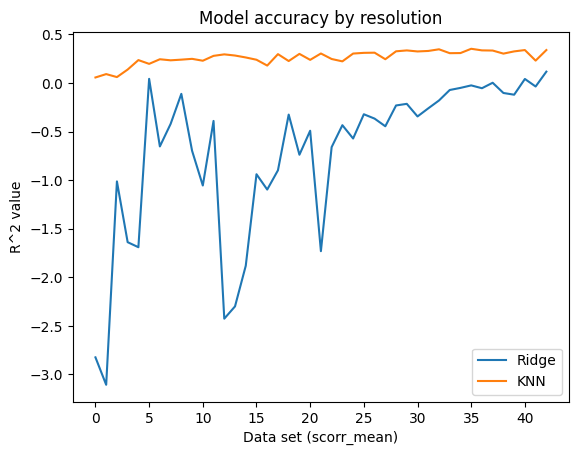

In [3]:
plt.title('Model accuracy by resolution');
plt.plot(np.arange(sets_n), accuracies.transpose());
plt.legend(['Ridge','KNN']);

plt.xticks(np.arange(0,45,5))
plt.xlabel('Data set (scorr_mean)');
plt.ylabel('R^2 value');

In [4]:
#Task 7

accuracies = np.zeros((10))
EIGHTY = round(data_n*0.8)
input = input_variables[9]

for i in range(10):
    model_KNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i+1).fit(input[:EIGHTY],output_variable[:EIGHTY])

    accuracy_KNN = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_KNN.predict(input[EIGHTY:]))

    accuracies[i]=accuracy_KNN


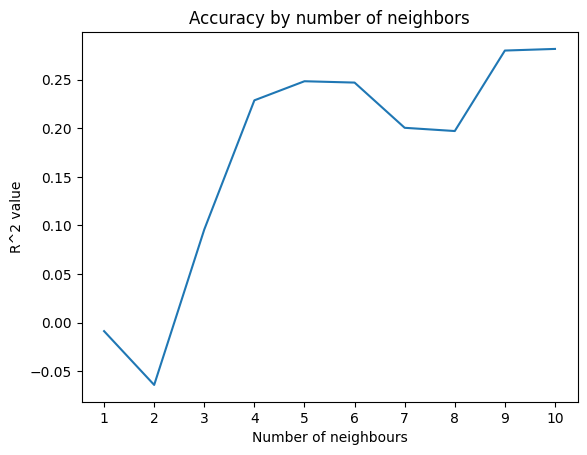

In [5]:
plt.plot(np.arange(1,11),accuracies);
plt.title('Accuracy by number of neighbors')
plt.ylabel("R^2 value")
plt.xlabel('Number of neighbours');
plt.xticks(np.arange(1,11));

In [6]:
#Task 8

accuracies = np.zeros((10))
input = input_variables[9]

for i in range(10):
    model_KNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i+1).fit(input,output_variable)

    accuracy_KNN = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_KNN.predict(input[EIGHTY:]))

    accuracies[i]=accuracy_KNN

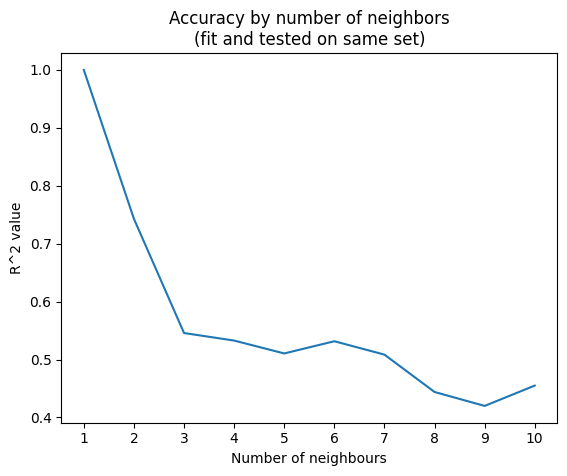

In [7]:
plt.plot(np.arange(1,11),accuracies);
plt.title('Accuracy by number of neighbors\n(fit and tested on same set)')
plt.ylabel("R^2 value")
plt.xlabel('Number of neighbours');
plt.xticks(np.arange(1,11));

In [13]:
#Task 9

accuracies = np.zeros((2,8))
input = input_variables[9]

indices = np.round(data_n*np.arange(0.1,0.9,0.1)).astype(np.short)
EIGHTY = round(data_n*0.8)


for i,j in enumerate(indices):
    model_Ridge= sklearn.linear_model.Ridge(alpha = 1, max_iter= 10000).fit(input[:j],output_variable[:j])
    model_KNN= sklearn.neighbors.KNeighborsRegressor(n_neighbors=3).fit(input[:j],output_variable[:j])

    accuracy_KNN = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_KNN.predict(input[EIGHTY:]))
    accuracy_Ridge = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_Ridge.predict(input[EIGHTY:]))

    accuracies[0,i]=accuracy_Ridge
    accuracies[1,i]=accuracy_KNN

Accuracy vs proportion of training data used table 


Percentage of training data used	|	R^2 for Ridge	|	 R^2 for KNN
----------------------------------------------------------------------------------------------------
		 10 			|	 -0.89 		|	 0.33
		 20 			|	 -0.18 		|	 0.47
		 30 			|	 -0.36 		|	 0.25
		 40 			|	 -1.36 		|	 0.21
		 50 			|	 -1.42 		|	 0.32
		 60 			|	 -1.34 		|	 0.27
		 70 			|	 -1.32 		|	 0.29
		 80 			|	 -0.7 		|	 0.1


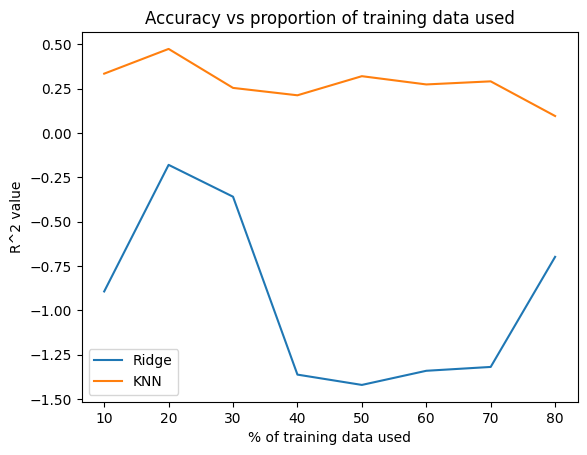

In [14]:
plt.plot(np.arange(1,9),accuracies.transpose());
plt.legend(['Ridge','KNN']);
plt.title('Accuracy vs proportion of training data used')
plt.ylabel("R^2 value")
plt.xlabel('% of training data used');
plt.xticks(np.arange(1,9),np.arange(1,9)*10);

accuracies = np.round(accuracies,2)

print('Accuracy vs proportion of training data used table \n\n')

print("Percentage of training data used\t|\tR^2 for Ridge\t|\t R^2 for KNN")
print('-'*100)
for i in range(8):
    print('\t\t',(i+1)*10,'\t'*3+'|\t',accuracies[0,i],'\t\t|\t',accuracies[1,i])

In [10]:
#Task 10

accuracies = np.zeros((2,10))
input = input_variables[9]

indices = np.round(input.shape[1]*np.arange(0.1,1.1,0.1)).astype(np.short)
EIGHTY = round(data_n*0.8)

for i,j in enumerate(indices):
    model_Ridge = sklearn.linear_model.Ridge(alpha = 1, max_iter= 10000).fit(input[:EIGHTY,:j],output_variable[:EIGHTY])
    model_KNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3).fit(input[:EIGHTY,:j],output_variable[:EIGHTY])

    accuracy_KNN = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_KNN.predict(input[EIGHTY:,:j]))
    accuracy_Ridge = sklearn.metrics.r2_score(output_variable[EIGHTY:], model_Ridge.predict(input[EIGHTY:,:j]))
    
    accuracies[0,i]=accuracy_Ridge
    accuracies[1,i]=accuracy_KNN

Accuracy vs percentage of dimentions used table 


Percentage of dimentions used		|	Accuracy Logreg (%)	|	 Accuracy KNN (%)
----------------------------------------------------------------------------------------------------
		 10 			|		 -1.08 		|		 -0.02
		 20 			|		 -0.7 		|		 -0.04
		 30 			|		 -1.29 		|		 0.14
		 40 			|		 -1.43 		|		 0.02
		 50 			|		 -0.58 		|		 0.17
		 60 			|		 -0.62 		|		 0.23
		 70 			|		 -0.9 		|		 0.13
		 80 			|		 -0.72 		|		 0.2
		 90 			|		 -0.57 		|		 0.12
		 100 			|		 -0.7 		|		 0.1


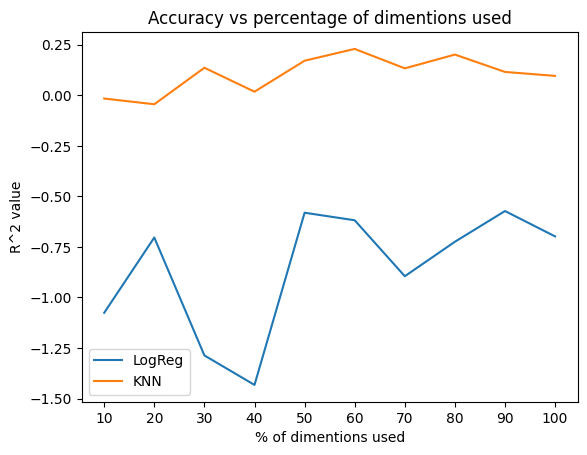

In [11]:
plt.plot(np.arange(1,11),accuracies.transpose());
plt.legend(['LogReg','KNN']);
plt.title('Accuracy vs percentage of dimentions used')
plt.ylabel("R^2 value")
plt.xlabel('% of dimentions used');
plt.xticks(np.arange(1,11),np.arange(1,11)*10);

accuracies = np.round(accuracies,2)

print('Accuracy vs percentage of dimentions used table \n\n')

print("Percentage of dimentions used\t\t|\tAccuracy Logreg (%)\t|\t Accuracy KNN (%)")
print('-'*100)
for i in range(10):
    print('\t\t',(i+1)*10,'\t'*3+'|\t\t',accuracies[0,i],'\t\t|\t\t',accuracies[1,i])